# Exploration des tickets de caisse

Ce notebook a pour but d’explorer les données brutes issues des tickets de caisse.  
Nous y effectuons une première analyse descriptive des clients, des produits, et des transactions, avec quelques visualisations clés.

## Étapes :
- Chargement des données (fichier CSV)
- Nettoyage de base (valeurs manquantes, quantités négatives)
- Statistiques descriptives :
  - Nombre de clients / produits
  - Répartition des achats
  - Produits les plus achetés

In [ ]:
# Ouverture du fichier
import pandas as pd
import matplotlib.pyplot as plt

FILE = "../data/Online_Retail"
DATA = pd.read_excel(FILE + ".xlsx")
DATA.to_csv(FILE + ".csv", index=False)
print(DATA.shape)
DATA.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Nettoyage du fichier
DATA = DATA.dropna()
DATA = DATA[DATA["Quantity"] > 0]
DATA = DATA[DATA["UnitPrice"] > 0]
DATA = DATA[DATA["CustomerID"].notnull()]
DATA = DATA[DATA["Country"].notnull()]
DATA = DATA[DATA["InvoiceNo"].notnull()]
DATA = DATA[DATA["InvoiceDate"].notnull()]
print(DATA.shape)
DATA.to_csv(FILE + "_cleaned.csv", index=False)
DATA.head()

(397884, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# - Statistiques descriptives :

#   - Nombre de clients / produits
print(f"Nombre de clients : {DATA['CustomerID'].nunique()}")
print(f"Nombre de produits : {DATA['StockCode'].nunique()}")

Nombre de clients : 4338
Nombre de produits : 3665


Répartition du produit par pays :
Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                 

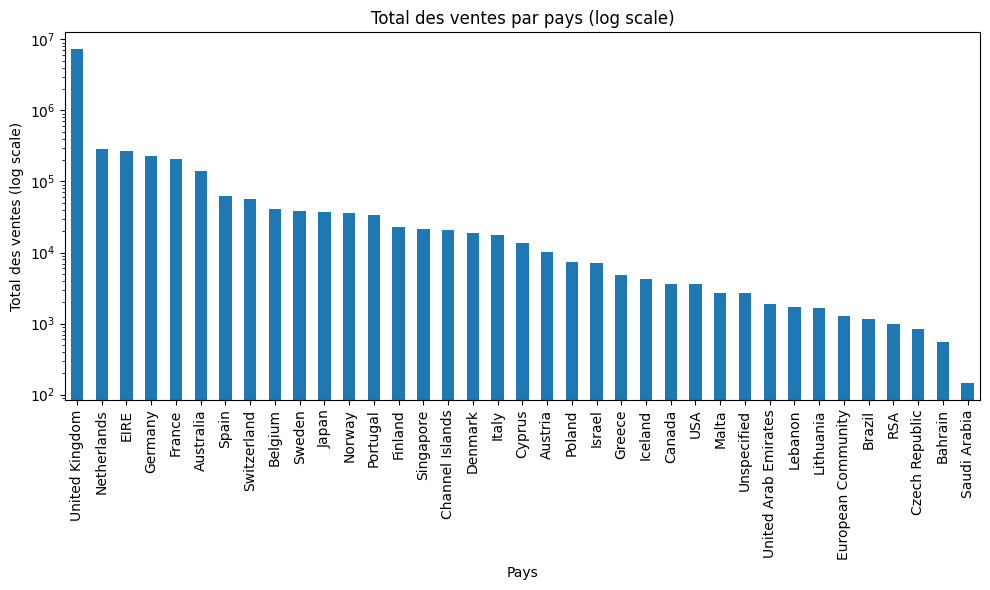

In [16]:
#   - Répartition des achats
DATA["TotalPrice"] = DATA["Quantity"] * DATA["UnitPrice"]
total_sales = DATA.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
print(f"Répartition du produit par pays :\n{total_sales}")

# barplot
plt.figure(figsize=(10, 6))
total_sales.plot(kind='bar', logy=True)
plt.title("Total des ventes par pays (log scale)")
plt.xlabel("Pays")
plt.ylabel("Total des ventes (log scale)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Produits les plus achetés :
StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64


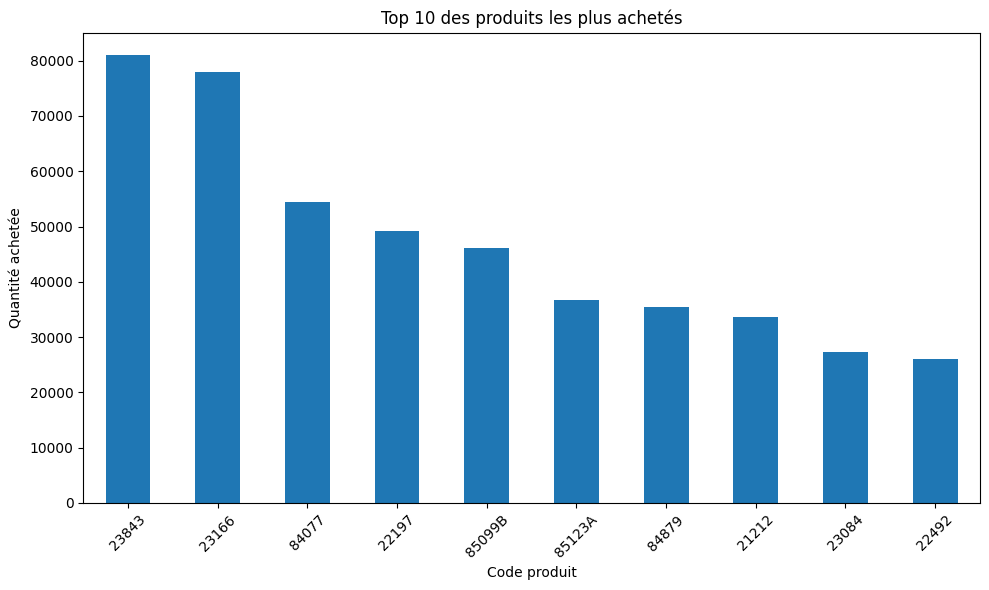

In [11]:
#   - Produits les plus achetés
top_products = DATA.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(10)
print(f"Produits les plus achetés :\n{top_products}")

# barplot
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title("Top 10 des produits les plus achetés")
plt.xlabel("Code produit")
plt.ylabel("Quantité achetée")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Produits les plus achetés :
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


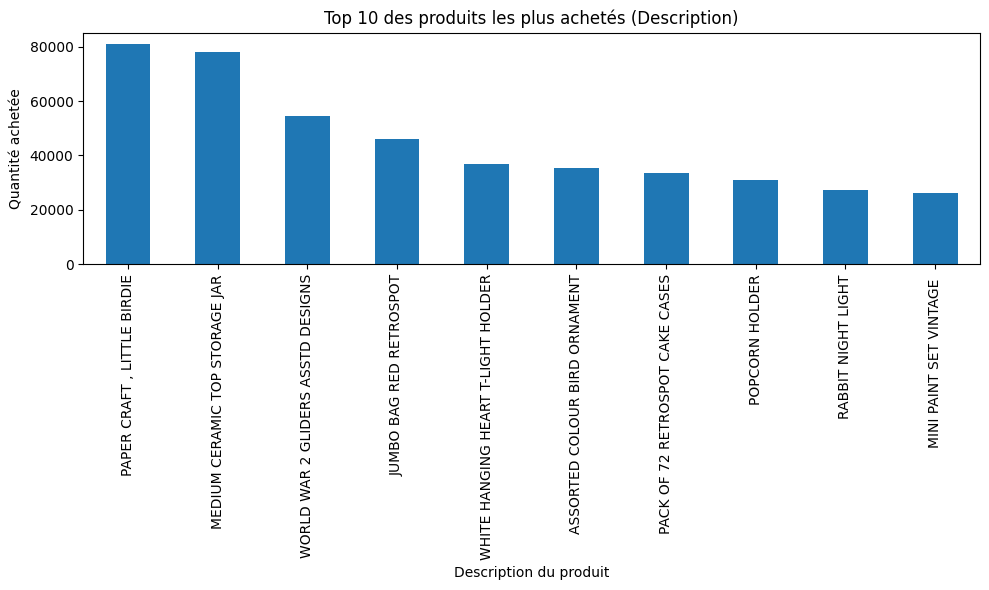

In [13]:
top_products = DATA.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
print(f"Produits les plus achetés :\n{top_products}")

# barplot
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title("Top 10 des produits les plus achetés (Description)")
plt.xlabel("Description du produit")
plt.ylabel("Quantité achetée")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()